<a href="https://colab.research.google.com/github/Felipe-Pinto/python_para_investimentos/blob/master/Avalia%C3%A7%C3%A3o_Op%C3%A7%C3%B5es_PETR4%20ultima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.stats import norm

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
Opções =pd.read_excel("/content/drive/MyDrive/Opções Dados/PETR4_23_04_24_to_21_06.xlsx",)
Opções

,Último,Preço Teórico,Volume,Delta,Intrínseco,Taxa,Bid,Ask,Strike,Stk%,Bid.1,Ask.1,Taxa.1,Intrínseco.1,Delta.1,Volume.1,Preço Teórico.1,PT%,Último.1,U%
0,10.34,10.72,"2,05k",0.99,10.17,0.2492,0.00,0.00,31.33,-0.237342,0.01,0.11,0.0014,0.00,-0.01,660,0.01,0.000243,0.12,0.002921
1,8.80,10.47,"7,01k",0.99,9.92,0.2120,0.00,0.00,31.58,-0.231256,0.01,0.46,0.0057,0.00,-0.01,"1,05k",0.01,0.000243,0.11,0.002678
2,9.22,9.99,"21,21k",0.99,9.42,0.2222,0.00,11.00,32.08,-0.219085,0.06,0.20,0.0031,0.00,-0.01,"1,95k",0.02,0.000487,0.13,0.003165
3,9.10,9.75,910,0.99,9.17,0.2193,0.00,0.00,32.33,-0.212999,0.10,0.50,0.0072,0.00,-0.01,565,0.02,0.000487,0.21,0.005112
4,8.55,9.50,"63,10k",0.99,8.92,0.2060,0.00,0.00,32.58,-0.206913,0.08,1.95,0.0245,0.00,-0.01,"1,84k",0.02,0.000487,0.14,0.003408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,0.07,0.12,"1,57k",0.06,0.00,0.0016,0.05,0.08,51.33,0.249513,0.00,0.00,0.2289,9.83,-0.94,"47,50k",9.07,0.220789,9.50,0.231256
69,0.01,0.00,4,0.00,0.00,0.0002,0.00,0.02,60.83,0.480769,0.00,0.00,0.4407,19.33,-1.00,0,18.29,0.445229,0.00,0.000000
70,0.00,0.00,0,0.00,0.00,0.0000,0.00,0.02,61.33,0.492941,0.00,0.00,0.5012,19.83,-1.00,"2,08k",18.78,0.457157,20.80,0.506329
71,0.00,0.00,0,0.00,0.00,0.0000,0.00,0.02,64.33,0.565969,0.00,0.00,0.5060,22.83,-1.00,"378,00k",21.73,0.528968,21.00,0.511198


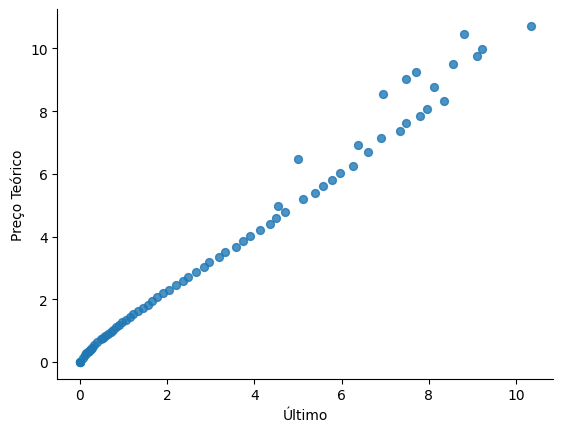

In [16]:
# @title Último vs Preço Teórico

from matplotlib import pyplot as plt
Opções.plot(kind='scatter', x='Último', y='Preço Teórico', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

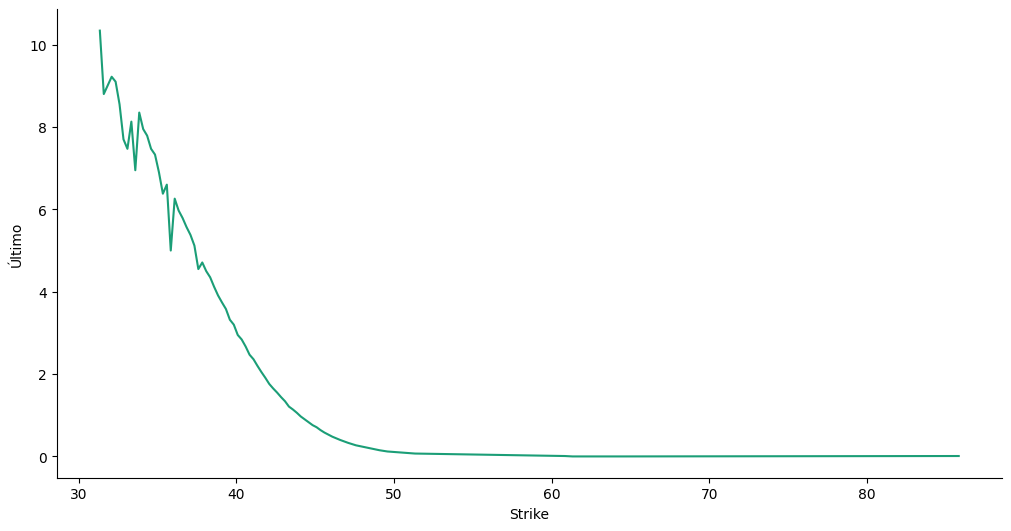

In [18]:
# @title Strike vs Último

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Strike']
  ys = series['Último']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = Opções.sort_values('Strike', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Strike')
_ = plt.ylabel('Último')

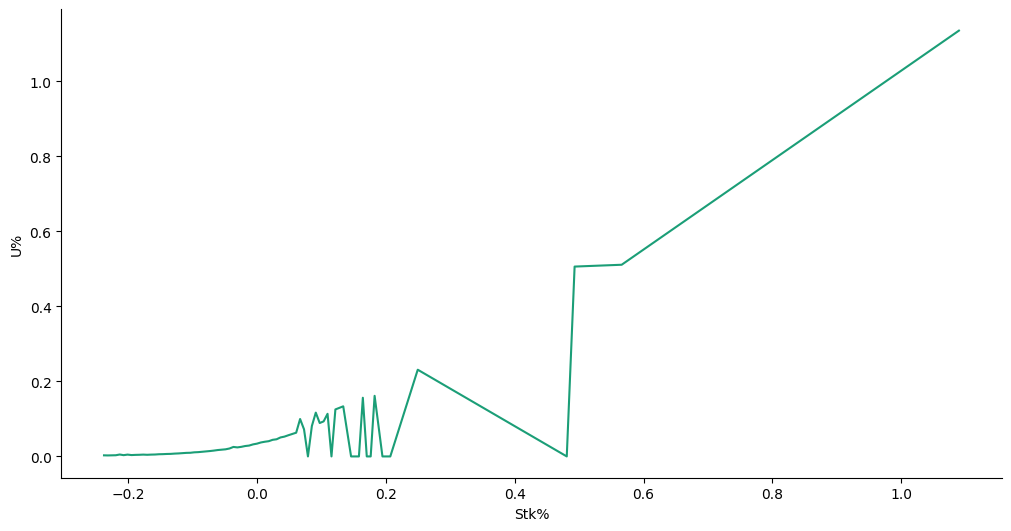

In [19]:
# @title Strike vs Último

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Stk%']
  ys = series['U%']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = Opções.sort_values('Stk%', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Stk%')
_ = plt.ylabel('U%')

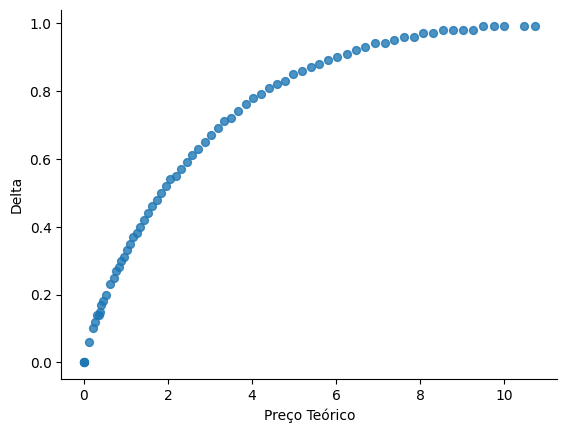

In [17]:
# @title Preço Teórico vs Delta

from matplotlib import pyplot as plt
Opções.plot(kind='scatter', x='Preço Teórico', y='Delta', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [10]:
Opções1 =pd.read_excel("/content/drive/MyDrive/Opções Dados/PETR4_23_04_24_to_21_06.xlsx",)
Opções1.head(5)

,Último,Preço Teórico,Volume,Delta,Intrínseco,Taxa,Bid,Ask,Strike,Stk%,Bid.1,Ask.1,Taxa.1,Intrínseco.1,Delta.1,Volume.1,Preço Teórico.1,PT%,Último.1,U%
0,10.34,10.72,"2,05k",0.99,10.17,0.2492,0.0,0.0,31.33,-0.237342,0.01,0.11,0.0014,0.0,-0.01,660,0.01,0.000243,0.12,0.002921
1,8.80,10.47,"7,01k",0.99,9.92,0.2120,0.0,0.0,31.58,-0.231256,0.01,0.46,0.0057,0.0,-0.01,"1,05k",0.01,0.000243,0.11,0.002678
2,9.22,9.99,"21,21k",0.99,9.42,0.2222,0.0,11.0,32.08,-0.219085,0.06,0.20,0.0031,0.0,-0.01,"1,95k",0.02,0.000487,0.13,0.003165
3,9.10,9.75,910,0.99,9.17,0.2193,0.0,0.0,32.33,-0.212999,0.10,0.50,0.0072,0.0,-0.01,565,0.02,0.000487,0.21,0.005112
4,8.55,9.50,"63,10k",0.99,8.92,0.2060,0.0,0.0,32.58,-0.206913,0.08,1.95,0.0245,0.0,-0.01,"1,84k",0.02,0.000487,0.14,0.003408


In [11]:
Opções2 =pd.read_excel("/content/drive/MyDrive/Opções Dados/PETR4_23_04_24_to_21_06.xlsx",)
Opções2.head(5)

,Último,Preço Teórico,Volume,Delta,Intrínseco,Taxa,Bid,Ask,Strike,Stk%,Bid.1,Ask.1,Taxa.1,Intrínseco.1,Delta.1,Volume.1,Preço Teórico.1,PT%,Último.1,U%
0,10.34,10.72,"2,05k",0.99,10.17,0.2492,0.0,0.0,31.33,-0.237342,0.01,0.11,0.0014,0.0,-0.01,660,0.01,0.000243,0.12,0.002921
1,8.80,10.47,"7,01k",0.99,9.92,0.2120,0.0,0.0,31.58,-0.231256,0.01,0.46,0.0057,0.0,-0.01,"1,05k",0.01,0.000243,0.11,0.002678
2,9.22,9.99,"21,21k",0.99,9.42,0.2222,0.0,11.0,32.08,-0.219085,0.06,0.20,0.0031,0.0,-0.01,"1,95k",0.02,0.000487,0.13,0.003165
3,9.10,9.75,910,0.99,9.17,0.2193,0.0,0.0,32.33,-0.212999,0.10,0.50,0.0072,0.0,-0.01,565,0.02,0.000487,0.21,0.005112
4,8.55,9.50,"63,10k",0.99,8.92,0.2060,0.0,0.0,32.58,-0.206913,0.08,1.95,0.0245,0.0,-0.01,"1,84k",0.02,0.000487,0.14,0.003408


In [12]:
Opções3 =pd.read_excel("/content/drive/MyDrive/Opções Dados/PETR4_23_04_24_to_21_06.xlsx",)
Opções2

,Último,Preço Teórico,Volume,Delta,Intrínseco,Taxa,Bid,Ask,Strike,Stk%,Bid.1,Ask.1,Taxa.1,Intrínseco.1,Delta.1,Volume.1,Preço Teórico.1,PT%,Último.1,U%
0,10.34,10.72,"2,05k",0.99,10.17,0.2492,0.00,0.00,31.33,-0.237342,0.01,0.11,0.0014,0.00,-0.01,660,0.01,0.000243,0.12,0.002921
1,8.80,10.47,"7,01k",0.99,9.92,0.2120,0.00,0.00,31.58,-0.231256,0.01,0.46,0.0057,0.00,-0.01,"1,05k",0.01,0.000243,0.11,0.002678
2,9.22,9.99,"21,21k",0.99,9.42,0.2222,0.00,11.00,32.08,-0.219085,0.06,0.20,0.0031,0.00,-0.01,"1,95k",0.02,0.000487,0.13,0.003165
3,9.10,9.75,910,0.99,9.17,0.2193,0.00,0.00,32.33,-0.212999,0.10,0.50,0.0072,0.00,-0.01,565,0.02,0.000487,0.21,0.005112
4,8.55,9.50,"63,10k",0.99,8.92,0.2060,0.00,0.00,32.58,-0.206913,0.08,1.95,0.0245,0.00,-0.01,"1,84k",0.02,0.000487,0.14,0.003408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,0.07,0.12,"1,57k",0.06,0.00,0.0016,0.05,0.08,51.33,0.249513,0.00,0.00,0.2289,9.83,-0.94,"47,50k",9.07,0.220789,9.50,0.231256
69,0.01,0.00,4,0.00,0.00,0.0002,0.00,0.02,60.83,0.480769,0.00,0.00,0.4407,19.33,-1.00,0,18.29,0.445229,0.00,0.000000
70,0.00,0.00,0,0.00,0.00,0.0000,0.00,0.02,61.33,0.492941,0.00,0.00,0.5012,19.83,-1.00,"2,08k",18.78,0.457157,20.80,0.506329
71,0.00,0.00,0,0.00,0.00,0.0000,0.00,0.02,64.33,0.565969,0.00,0.00,0.5060,22.83,-1.00,"378,00k",21.73,0.528968,21.00,0.511198


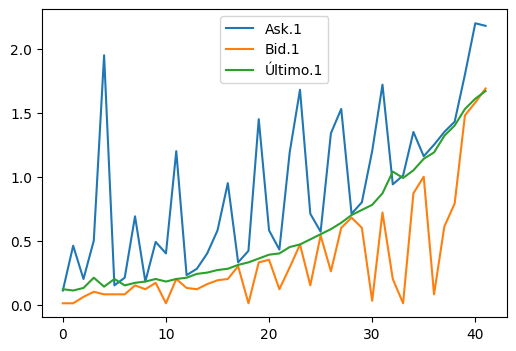

In [13]:
# Ask são os vendedores
# Bid são os compradores
# Último valor negociado
PUTs_OTM = Opções[(Opções['Intrínseco.1']<=0.5)]
PUTs_OTM1 = Opções1[(Opções1['Intrínseco.1']<=0.5)]
PUTs_OTM2 = Opções2[(Opções2['Intrínseco.1']<=0.5)]
PUTs_OTM3 = Opções3[(Opções3['Intrínseco.1']<=0.5)]
PUTs_OTM[['Ask.1','Bid.1','Último.1']].plot(figsize = (6,4));

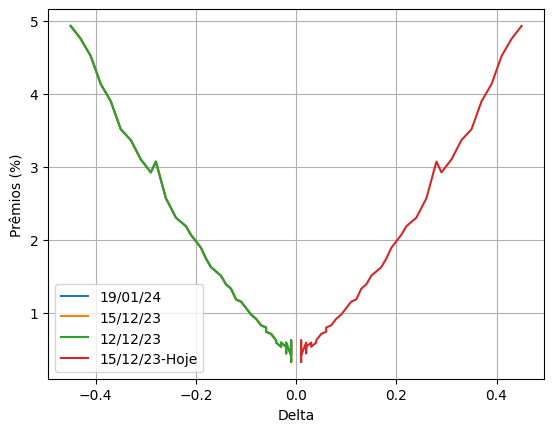

In [14]:
Ativo = 33.86
#plt.plot(PUTs_OTM[['Delta.1']],PUTs_OTM[['Ask.1']]*100/Ativo,label='Ask')
#plt.plot(PUTs_OTM[['Delta.1']],PUTs_OTM[['Bid.1']]*100/Ativo,label='Bid')
plt.plot(PUTs_OTM[['Delta.1']],PUTs_OTM[['Último.1']]*100/Ativo,label='19/01/24')
plt.plot(PUTs_OTM1[['Delta.1']],PUTs_OTM1[['Último.1']]*100/Ativo,label='15/12/23')
plt.plot(PUTs_OTM2[['Delta.1']],PUTs_OTM2[['Último.1']]*100/Ativo,label='12/12/23')
plt.plot(-PUTs_OTM3[['Delta.1']],PUTs_OTM3[['Último.1']]*100/Ativo,label='15/12/23-Hoje')
plt.legend()
plt.grid()
plt.xlabel('Delta')
plt.ylabel('Prêmios (%)')
plt.show()

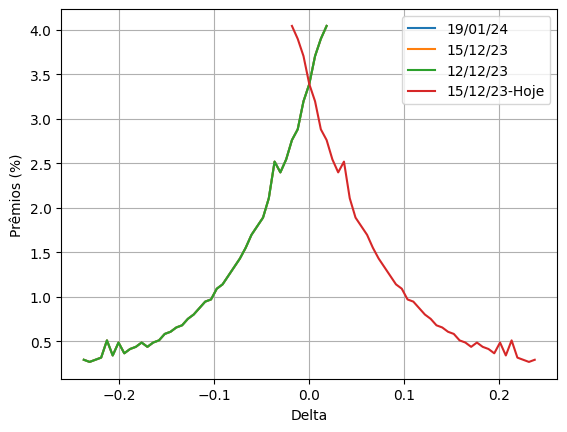

In [15]:
Ativo = 41.31
#plt.plot(PUTs_OTM[['Delta.1']],PUTs_OTM[['Ask.1']]*100/Ativo,label='Ask')
#plt.plot(PUTs_OTM[['Delta.1']],PUTs_OTM[['Bid.1']]*100/Ativo,label='Bid')
plt.plot(PUTs_OTM[['Stk%']],PUTs_OTM[['Último.1']]*100/Ativo,label='19/01/24')
plt.plot(PUTs_OTM1[['Stk%']],PUTs_OTM1[['Último.1']]*100/Ativo,label='15/12/23')
plt.plot(PUTs_OTM2[['Stk%']],PUTs_OTM2[['Último.1']]*100/Ativo,label='12/12/23')
plt.plot(-PUTs_OTM3[['Stk%']],PUTs_OTM3[['Último.1']]*100/Ativo,label='15/12/23-Hoje')
plt.legend()
plt.grid()
plt.xlabel('Delta')
plt.ylabel('Prêmios (%)')
plt.show()

In [ ]:
# A mesma análise para as Calls
CALLs_OTM = Opções[(Opções['Intrínseco']<=0.5)]
CALLs_OTM1 = Opções1[(Opções1['Intrínseco']<=0.5)]
CALLs_OTM2 = Opções2[(Opções2['Intrínseco']<=0.5)]
CALLs_OTM3 = Opções3[(Opções3['Intrínseco']<=0.5)]

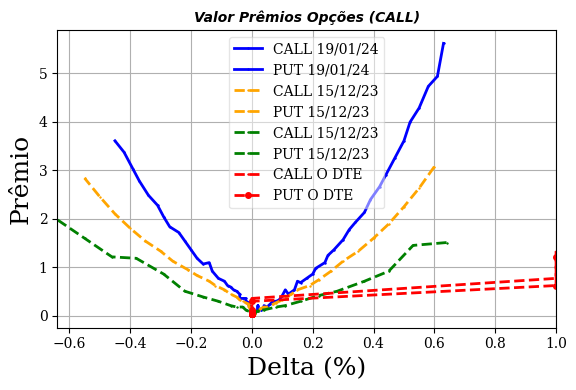

In [ ]:
# A mesma análise para as Calls
#Visualizar o gráfico
#plt.style.use('seaborn')
#plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.figure(figsize=(6,4))
plt.title('Valor Prêmios Opções (CALL)', fontsize=10, fontweight='bold', fontstyle='italic', fontfamily='sans-serif')
plt.xlabel('Delta (%)',fontsize=18)
plt.ylabel('Prêmio',fontsize=18)
plt.tight_layout()
plt.margins(x=0, y=0.05)
#plt.plot(CALLs_OTM['Delta'],CALLs_OTM['Ask']*100/Ativo,  label='Vendedor', color='blue',linestyle='dashed', linewidth=2)
#plt.plot(CALLs_OTM['Delta'],CALLs_OTM['Bid']*100/Ativo,  label='Comprador', color='red', linestyle='dashed', linewidth=2)
plt.plot(CALLs_OTM['Delta'],CALLs_OTM['Último']*100/Ativo,  label='CALL 19/01/24', color='blue', marker='+', linewidth=2, markersize=2)
plt.plot(PUTs_OTM['Delta.1'],PUTs_OTM['Último.1']*100/Ativo,  label='PUT 19/01/24', color='blue', marker='+', linewidth=2, markersize=2)
plt.plot(CALLs_OTM1['Delta'],CALLs_OTM1['Último']*100/Ativo,  label='CALL 15/12/23', color='orange', marker='+',linestyle='dashed', linewidth=2, markersize=2)
plt.plot(PUTs_OTM1['Delta.1'],PUTs_OTM1['Último.1']*100/Ativo,  label='PUT 15/12/23', color='orange', marker='+',linestyle='dashed', linewidth=2, markersize=2)
plt.plot(CALLs_OTM2['Delta'],CALLs_OTM2['Último']*100/Ativo,  label='CALL 15/12/23', color='green', marker='+',linestyle='dashed', linewidth=2, markersize=2)
plt.plot(PUTs_OTM2['Delta.1'],PUTs_OTM2['Último.1']*100/Ativo,  label='PUT 15/12/23', color='green', marker='+',linestyle='dashed', linewidth=2, markersize=2)
plt.plot(CALLs_OTM3['Delta'],CALLs_OTM3['Último']*100/Ativo,  label='CALL O DTE', color='red', marker='+',linestyle='dashed', linewidth=2, markersize=2)
plt.plot(PUTs_OTM3['Delta.1'],PUTs_OTM3['Último.1']*100/Ativo,  label='PUT O DTE', color='red', marker='o',linestyle='dashed', linewidth=2, markersize=4)
plt.legend(fontsize=10, frameon=True, framealpha=0.5, facecolor='white')
plt.grid(True)
plt.show()

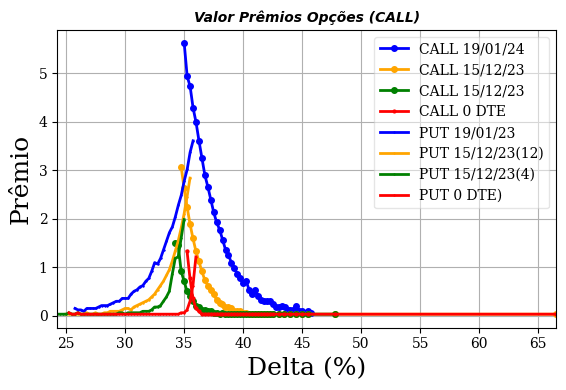

In [ ]:
# A mesma análise para as Calls em função do preço do ativo
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.figure(figsize=(6,4))
plt.title('Valor Prêmios Opções (CALL)', fontsize=10, fontweight='bold', fontstyle='italic', fontfamily='sans-serif')
plt.xlabel('Delta (%)',fontsize=18)
plt.ylabel('Prêmio',fontsize=18)
plt.tight_layout()
plt.margins(x=0, y=0.05)
#plt.plot(CALLs_OTM['Delta'],CALLs_OTM['Ask']*100/Ativo,  label='Vendedor', color='blue',linestyle='dashed', linewidth=2)
#plt.plot(CALLs_OTM['Delta'],CALLs_OTM['Bid']*100/Ativo,  label='Comprador', color='red', linestyle='dashed', linewidth=2)
plt.plot(CALLs_OTM['Strike'],CALLs_OTM['Último']*100/Ativo,  label='CALL 19/01/24', color='blue', marker='o', linewidth=2, markersize=4)
plt.plot(CALLs_OTM1['Strike'],CALLs_OTM1['Último']*100/Ativo,  label='CALL 15/12/23', color='orange', marker='o', linewidth=2, markersize=4)
plt.plot(CALLs_OTM2['Strike'],CALLs_OTM2['Último']*100/Ativo,  label='CALL 15/12/23', color='green', marker='o', linewidth=2, markersize=4)
plt.plot(CALLs_OTM3['Strike'],CALLs_OTM3['Último']*100/Ativo,  label='CALL 0 DTE', color='red', marker='o', linewidth=2, markersize=2)
plt.plot(PUTs_OTM['Strike'],PUTs_OTM['Último.1']*100/Ativo,  label='PUT 19/01/23', color='blue', marker='+', linewidth=2, markersize=2)
plt.plot(PUTs_OTM1['Strike'],PUTs_OTM1['Último.1']*100/Ativo,  label='PUT 15/12/23(12)', color='orange', marker='+', linewidth=2, markersize=2)
plt.plot(PUTs_OTM2['Strike'],PUTs_OTM2['Último.1']*100/Ativo,  label='PUT 15/12/23(4)', color='green', marker='+', linewidth=2, markersize=2)
plt.plot(PUTs_OTM3['Strike'],PUTs_OTM3['Último.1']*100/Ativo,  label='PUT 0 DTE)', color='red', marker='+', linewidth=2, markersize=1)
plt.legend(fontsize=10, frameon=True, framealpha=0.5, facecolor='white')
plt.grid(True)
plt.show()

In [ ]:
def BlackScholes(r, S, K, T, sigma, type="c"):
    "Calculate BS price of call/put"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        if type == "c":
            price = S*norm.cdf(d1, 0, 1) - K*np.exp(-r*T)*norm.cdf(d2, 0, 1)
        elif type == "p":
            price = K*np.exp(-r*T)*norm.cdf(-d2, 0, 1) - S*norm.cdf(-d1, 0, 1)
        return price
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

In [ ]:
r = 12.5/100       # Interest tax
S1 = 35.52          # Stock
S = np.linspace(28,40,100)
K = 36         # Stirke
#T = 1/252      # Time to end
T = 0.2/252
sigma = 0.60    # Volatility
type="c"

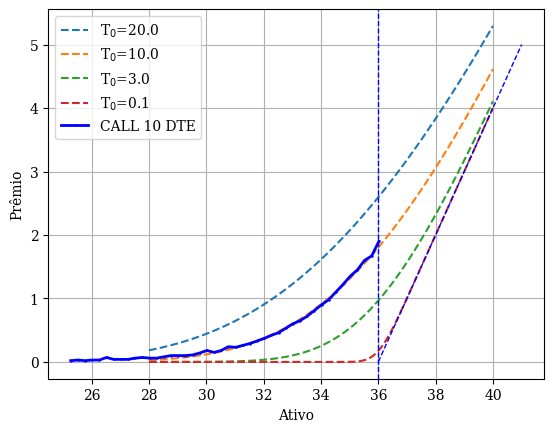

In [ ]:
# Solução de BS para diferentes prazos
for Ti in [20/252,10/252,3.0/252,0.1/252]:
  y = BlackScholes(r, S, K, Ti, sigma, type="c")
  plt.plot(S,y,label=r'T$_0$='+str(Ti*252), linestyle='dashed')
  X = 2*S1-CALLs_OTM['Strike']

plt.plot(X,CALLs_OTM['Último'],  label='CALL 10 DTE', color='blue', marker='+', linewidth=2, markersize=2)
plt.axvline(x=K,ymin=0,ymax=10.0, color='b', linestyle='dashed',linewidth=1)
plt.plot([K,K+5],[0,5], color='b', linestyle='dashed',linewidth=1)
plt.grid()
plt.legend()
plt.xlabel('Ativo')
plt.ylabel('Prêmio')
plt.show()

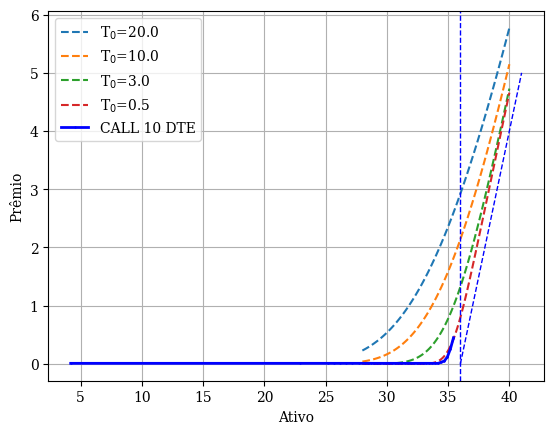

In [ ]:
S3 = 35.35          # Stock
# Solução de BS para diferentes prazos
for Ti in [20/252,10/252,3.0/252,0.5/252]:
  y = BlackScholes(r, S, S3, Ti, sigma, type="c")
  plt.plot(S,y,label=r'T$_0$='+str(Ti*252), linestyle='dashed')
  X3 = 2*S3-CALLs_OTM3['Strike']

plt.plot(X3,CALLs_OTM3['Último'],  label='CALL 10 DTE', color='blue', marker='+', linewidth=2, markersize=2)
plt.axvline(x=K,ymin=0,ymax=10.0, color='b', linestyle='dashed',linewidth=1)
plt.plot([K,K+5],[0,5], color='b', linestyle='dashed',linewidth=1)
plt.grid()
plt.legend()
plt.xlabel('Ativo')
plt.ylabel('Prêmio')
plt.show()